In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

# load data

In [2]:
df = pd.read_csv('trainLabels.csv')

In [3]:
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


# check issue data 

In [4]:
df.keys()

Index(['image', 'level'], dtype='object')

In [5]:
(df.isnull()).describe()

,image,level
count,35126,35126
unique,1,1
top,False,False
freq,35126,35126


# basic description

In [6]:
df.level.describe()

count    35126.000000
mean         0.526049
std          0.970390
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: level, dtype: float64

In [7]:
df.level.value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

Text(0,0.5,'Distribution')

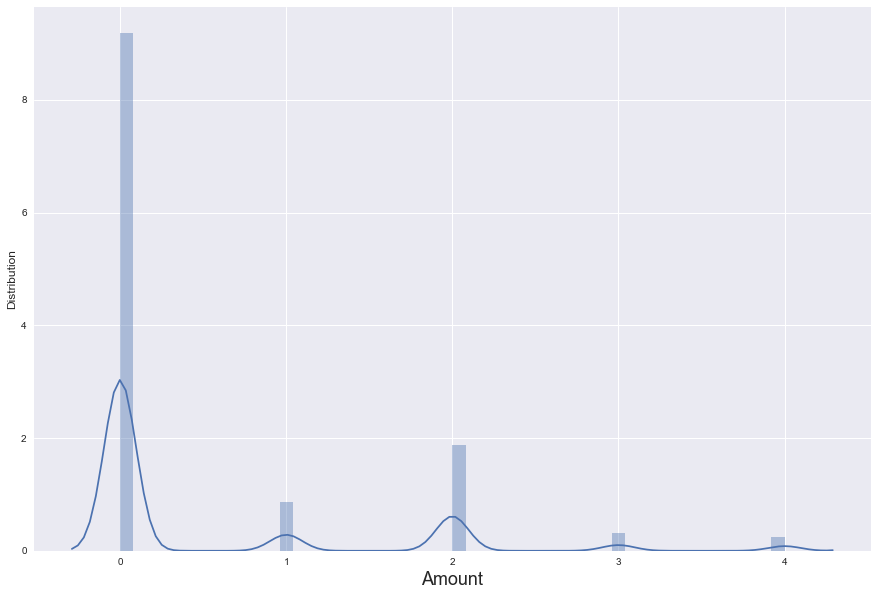

In [8]:
plot = df.level.tolist()
sns.set(rc={'figure.figsize':(15,10)})
x=plot
sns.distplot(x)
plt.xlabel('Amount', fontsize=18)
plt.ylabel('Distribution', fontsize=12)

Text(0,0.5,'Amount')

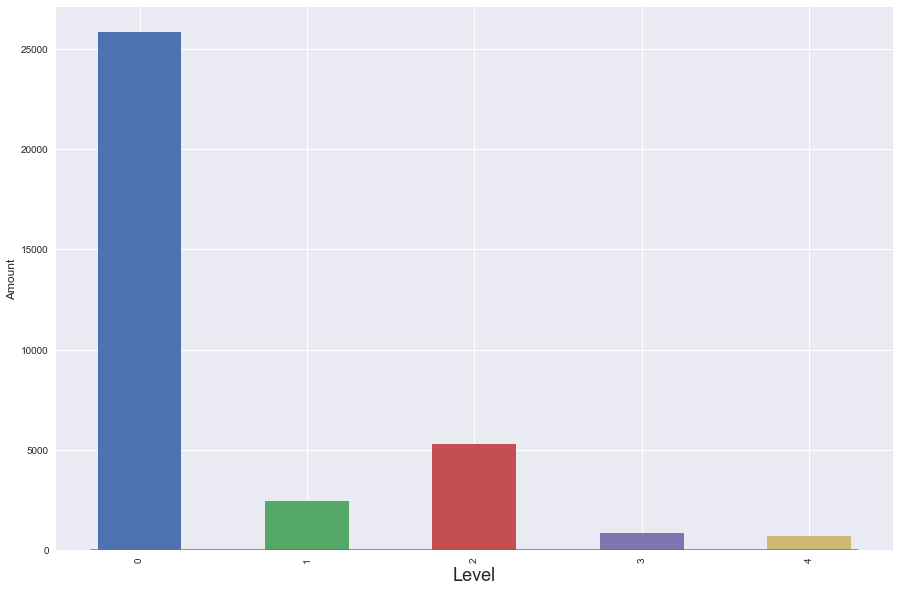

In [9]:
vcount = df.level.value_counts()
a = vcount.sort_index()
sns.set(rc={'figure.figsize':(15,10)})
a.plot(kind='bar')
sns.distplot(x)
plt.xlabel('Level', fontsize=18)
plt.ylabel('Amount', fontsize=12)

# split to the right eye and left eye

In [22]:
df.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [23]:
im_name = df.image.str.split('_', expand = True)
im_name['level'] = df.level

In [24]:
im_name.head()

,0,1,level
0,10,left,0
1,10,right,0
2,13,left,0
3,13,right,0
4,15,left,1


In [25]:
im_name.columns = ['number', 'label','level']

In [26]:
im_name.head()

,number,label,level
0,10,left,0
1,10,right,0
2,13,left,0
3,13,right,0
4,15,left,1


In [27]:
right_df = im_name[im_name.label=="right"]
right_df = right_df.reset_index()
right_df.head()

,index,number,label,level
0,1,10,right,0
1,3,13,right,0
2,5,15,right,2
3,7,16,right,4
4,9,17,right,1


In [29]:
left_df = im_name[im_name.label=="left"]
left_df = left_df.reset_index()
left_df.columns = ['index_left', 'number_left', 'label_left','level_left']
left_df.head()

,index_left,number_left,label_left,level_left
0,0,10,left,0
1,2,13,left,0
2,4,15,left,1
3,6,16,left,4
4,8,17,left,0


In [30]:
df_merge = left_df.join(right_df, how='outer')
df_merge.head()

,index_left,number_left,label_left,level_left,index,number,label,level
0,0,10,left,0,1,10,right,0
1,2,13,left,0,3,13,right,0
2,4,15,left,1,5,15,right,2
3,6,16,left,4,7,16,right,4
4,8,17,left,0,9,17,right,1


In [32]:
(df_merge.number == df_merge.number_left).unique()

array([ True], dtype=bool)

In [33]:
df_merge['differ'] = df_merge.level-df_merge.level_left
df_merge.head()

,index_left,number_left,label_left,level_left,index,number,label,level,differ
0,0,10,left,0,1,10,right,0,0
1,2,13,left,0,3,13,right,0,0
2,4,15,left,1,5,15,right,2,1
3,6,16,left,4,7,16,right,4,0
4,8,17,left,0,9,17,right,1,1


In [34]:
df_merge.differ.value_counts()

 0    15323
-1      784
 1      701
-2      376
 2      347
 4       11
-4       10
 3        7
-3        4
Name: differ, dtype: int64

In [40]:
plot_count = df_merge.differ.value_counts()

Text(0,0.5,'Amount')

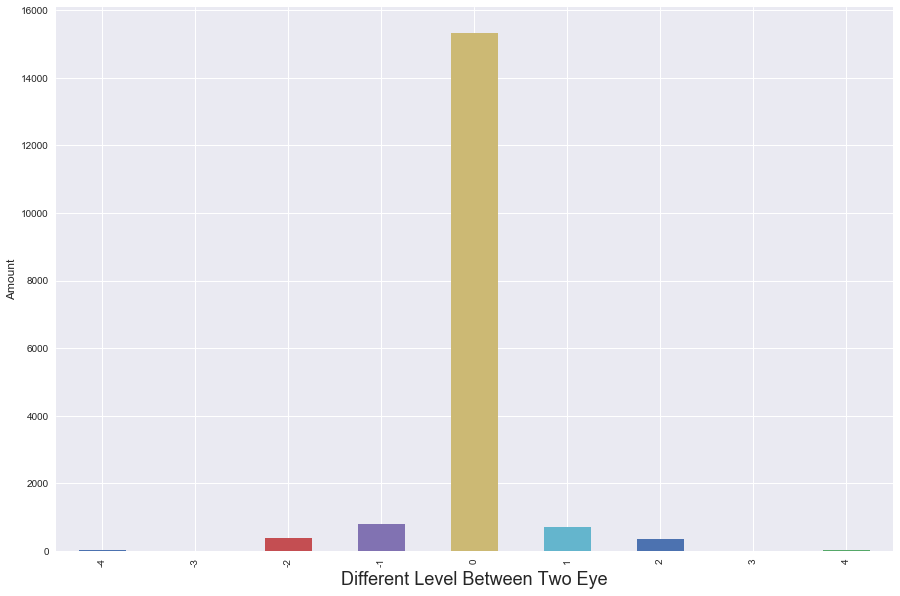

In [42]:
a = (df_merge.differ.value_counts()).sort_index()
sns.set(rc={"figure.figsize": (15, 10)})
# sns.countplot(x='a', data=plot_count)
a.plot(kind='bar')
plt.xlabel('Different Level Between Two Eye', fontsize=18)
plt.ylabel('Amount', fontsize=12)

Text(0,0.5,'Amount of Right eye')

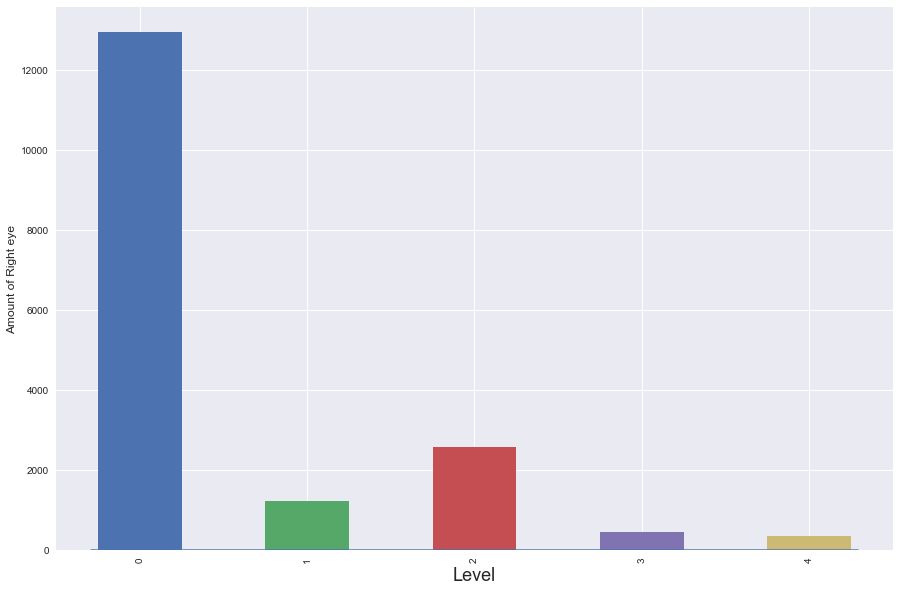

In [36]:
count = right_df.level.value_counts()
a = count.sort_index()
sns.set(rc={'figure.figsize':(15,10)})
a.plot(kind='bar')
sns.distplot(x)
plt.xlabel('Level', fontsize=18)
plt.ylabel('Amount of Right eye', fontsize=12)

Text(0,0.5,'Amount of Left eye')

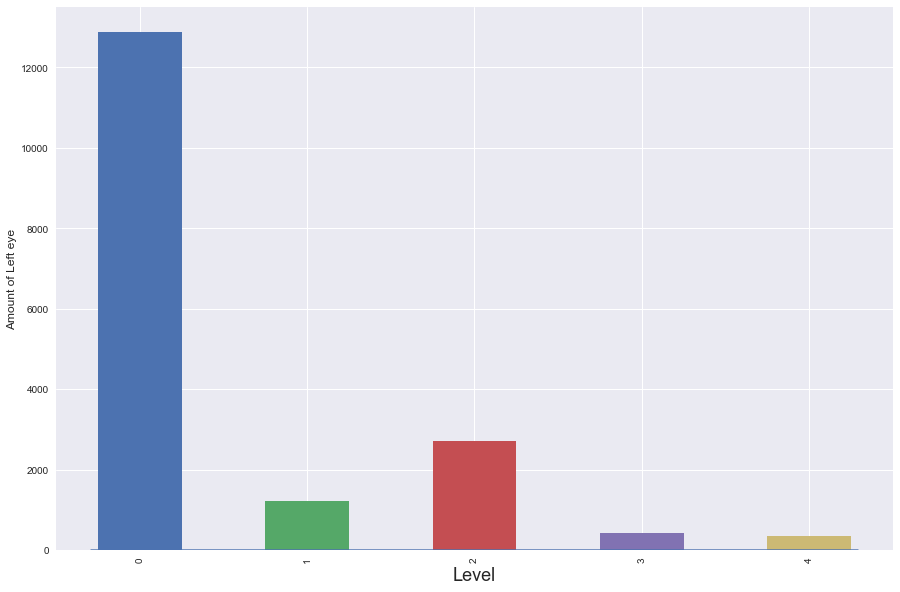

In [38]:
count = left_df.level_left.value_counts()
a = count.sort_index()
sns.set(rc={'figure.figsize':(15,10)})
a.plot(kind='bar')
sns.distplot(x)
plt.xlabel('Level', fontsize=18)
plt.ylabel('Amount of Left eye', fontsize=12)

In [39]:
fig=plt.figure(dpi=1600)
# alpha_level=0.6

ax1=fig.add_subplot(221)
aa= left_df['level_left']
plt.hist(aa,color='red',normed=True,bins=range(0,6), edgecolor='white')
plt.xticks()
plt.xlabel('The Levels of Left Eyes')
plt.ylabel('Probility Distribution ')


ax2=fig.add_subplot(222)
bb= right_df['level']
plt.hist(bb,color='blue',normed=True,bins=range(0,6), edgecolor='white')
plt.xticks()
plt.xlabel('The Levels of Right Eyes')
plt.ylabel('Probility Distribution ')
plt.show()